In [14]:
import numpy as np
import json
from pprint import pprint
import matplotlib.pyplot as plt
from collections import defaultdict

plt.rcParams['figure.figsize'] = [16, 28]

In [15]:
#Opening the experiment json
def load_probe_metric_list(fname):
    with open(fname,"r") as rhandle:
        probe_metric_list = json.load(rhandle)
    
    #Converting the metric into usable format
    pdict = defaultdict(list)
    for idx in range(len(probe_metric_list)):
        pdict["angle:m-t0"].append(probe_metric_list[idx]["conv_angle_dict"]["main"]["topic0"])
        pdict["angle:m-t1"].append(probe_metric_list[idx]["conv_angle_dict"]["main"]["topic1"])
        pdict["angle:t0-t1"].append(probe_metric_list[idx]["conv_angle_dict"]["topic0"]["topic1"])
        pdict["acc:main"].append(probe_metric_list[idx]["classifier_acc_dict"]["main"])
        pdict["acc:topic0"].append(probe_metric_list[idx]["classifier_acc_dict"]["topic0"])
        pdict["acc:topic0_main"].append(probe_metric_list[idx]["classifier_acc_dict"]["topic0_flip_main"])
        pdict["acc:topic0_pdelta"].append(probe_metric_list[idx]["classifier_acc_dict"]["topic0_flip_main_pdelta"])
        pdict["acc:topic1"].append(probe_metric_list[idx]["classifier_acc_dict"]["topic1"])
        pdict["acc:topic1_main"].append(probe_metric_list[idx]["classifier_acc_dict"]["topic1_flip_main"])
        pdict["acc:topic1_pdelta"].append(probe_metric_list[idx]["classifier_acc_dict"]["topic1_flip_main_pdelta"])
    return pdict

In [16]:
#Collecting multiple runs of experiment
def aggregate_random_runs(rdict_list):
    '''
    '''
    rdict_agg_list = defaultdict(list)
    for rdict in rdict_list:
        for key,val in rdict.items():
            rdict_agg_list[key]+=val
    
    #Now taking the mean of the experiments
    rdict_agg = defaultdict(list)
    for key,val in rdict_agg_list.items():
        rdict_agg[key] = dict(
                            mean = np.mean(val),
                            std  = np.std(val)
        )
    
    return rdict_agg

def get_all_result_dict(run_list,pval_list,fname_pattern):
    all_result_dict = {}
    for pidx,pval in enumerate(pval_list):
        prdict_list = []
        for nidx in run_list:
            fname = fname_pattern.format(pval,nidx)
            prdict = load_probe_metric_list(fname)
            prdict_list.append(prdict)
        #Getting the aggregate result
        prdict_agg = aggregate_random_runs(prdict_list)
        all_result_dict[pval] = prdict_agg

    return all_result_dict

def plot_all_results(ax,pval_list,all_result_dict,plot_item_list,extra_label=""):
    '''
    '''
    #Now we can reuse the previous ax
    if(type(ax)!=type(np.array([1,2]))):
        fig,ax = plt.subplots(len(plot_item_list),)
        
    for iidx,item_name in enumerate(plot_item_list):
        #Colletcing the metrics
        yval = [all_result_dict[pval][item_name]["mean"] for pval in pval_list]
        yerr = [all_result_dict[pval][item_name]["std"] for pval in pval_list]
        #Plotting the guy
        ax[iidx].errorbar(pval_list,yval,yerr,ls="-.",marker="o",label=item_name+extra_label)
#         ax[iidx].set_ylim(0.0,1.0)
        ax[iidx].set_xlabel("correlation value [0.5,1]")
        ax[iidx].set_ylabel("convergence angle")
        ax[iidx].legend()
        ax[iidx].grid(True)
    return ax

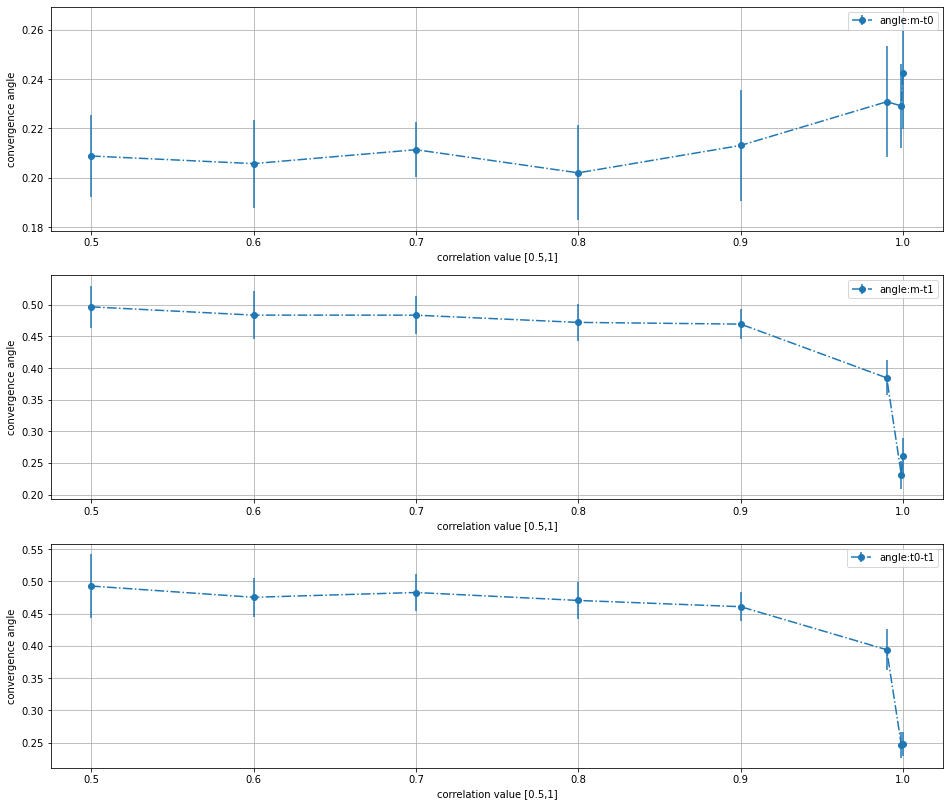

'\nObservations:\n1. Why is the angle difference between the main and t0.\n2. Why lower correlation regimens dont have much convergence angle?\n    2.1 Is it because of large number of training epoch? What is the effect of epcoh number\n3. We expected large deviation in between different random runs as the correlation increases\n    Should we set different seed for numpy and tf?\n    Also we could get a more decreasing pattern if we do more runs as avg will be then low angle bw t0 and t1\n'

In [76]:
#Aggregating all the runs
run_list = range(10)
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99,0.999,0.9999]
all_result_dict = get_all_result_dict(run_list=run_list,
                                      pval_list=pval_list,
                                      fname_pattern="nlp_logs/pt.rel.{}.{}/probe_metric_list.json"
)
plot_item_list = [
                    "angle:m-t0",
                    "angle:m-t1",
                    "angle:t0-t1"
]
ax = plot_all_results(None,pval_list,all_result_dict,plot_item_list)
plt.show()


'''
Observations:
1. Why is the angle difference between the main and t0.
2. Why lower correlation regimens dont have much convergence angle?
    2.1 Is it because of large number of training epoch? What is the effect of epcoh number
3. We expected large deviation in between different random runs as the correlation increases
    Should we set different seed for numpy and tf?
    Also we could get a more decreasing pattern if we do more runs as avg will be then low angle bw t0 and t1
'''

# Variation with Number of samples

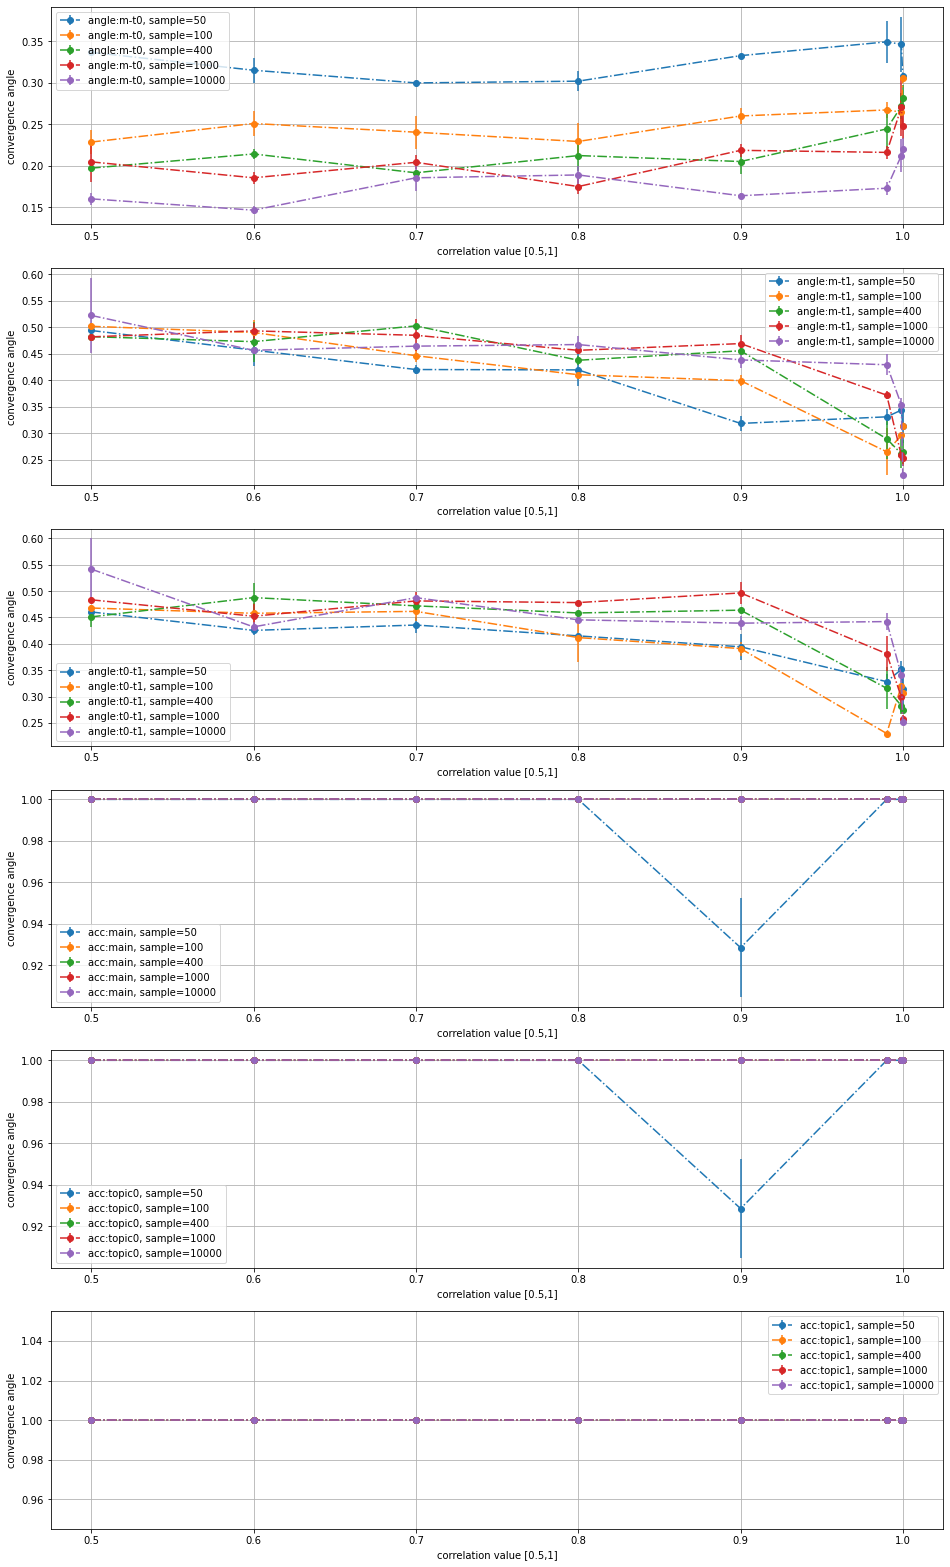

In [101]:
#Getting the result for different epochs
run_list=[0,1,]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99,0.999,0.9999]
plot_item_list = [
                    "angle:m-t0",
                    "angle:m-t1",
                    "angle:t0-t1",
                    "acc:main",
                    "acc:topic0",
                    "acc:topic1"
]


#Getting the results with epoch 10 and num samples 25
# all_result_dict = get_all_result_dict(run_list=run_list,
#                                       pval_list=pval_list,
#                                       fname_pattern="nlp_logs/pt.rel.25.10.{}.{}/probe_metric_list.json"
# )
# ax = plot_all_results(None,pval_list,all_result_dict,plot_item_list,extra_label=", sample=25")

#Getting the results with epoch 10 and num samples 50
all_result_dict = get_all_result_dict(run_list=run_list,
                                      pval_list=pval_list,
                                      fname_pattern="nlp_logs/pt.rel.50.10.{}.{}/probe_metric_list.json"
)
ax = plot_all_results(None,pval_list,all_result_dict,plot_item_list,extra_label=", sample=50")

#Getting the results with epoch 10 and num samples 100
all_result_dict = get_all_result_dict(run_list=run_list,
                                      pval_list=pval_list,
                                      fname_pattern="nlp_logs/pt.rel.100.10.{}.{}/probe_metric_list.json"
)
ax = plot_all_results(ax,pval_list,all_result_dict,plot_item_list,extra_label=", sample=100")

#Getting the results with epoch 10 and num samples 400
all_result_dict = get_all_result_dict(run_list=run_list,
                                      pval_list=pval_list,
                                      fname_pattern="nlp_logs/pt.rel.400.10.{}.{}/probe_metric_list.json"
)
ax = plot_all_results(ax,pval_list,all_result_dict,plot_item_list,extra_label=", sample=400")


# Getting the results with epoch 10 and num samples 1000
all_result_dict = get_all_result_dict(run_list=run_list,
                                      pval_list=pval_list,
                                      fname_pattern="nlp_logs/pt.rel.1000.10.{}.{}/probe_metric_list.json"
)
ax = plot_all_results(ax,pval_list,all_result_dict,plot_item_list,extra_label=", sample=1000")

# #Getting the results with epoch 10 and num samples 10000
all_result_dict = get_all_result_dict(run_list=run_list,
                                      pval_list=pval_list,
                                      fname_pattern="nlp_logs/pt.rel.10000.10.{}.{}/probe_metric_list.json"
)
ax = plot_all_results(ax,pval_list,all_result_dict,plot_item_list,extra_label=", sample=10000")
plt.show()

# plt.show()

# Variation with Number of Epochs

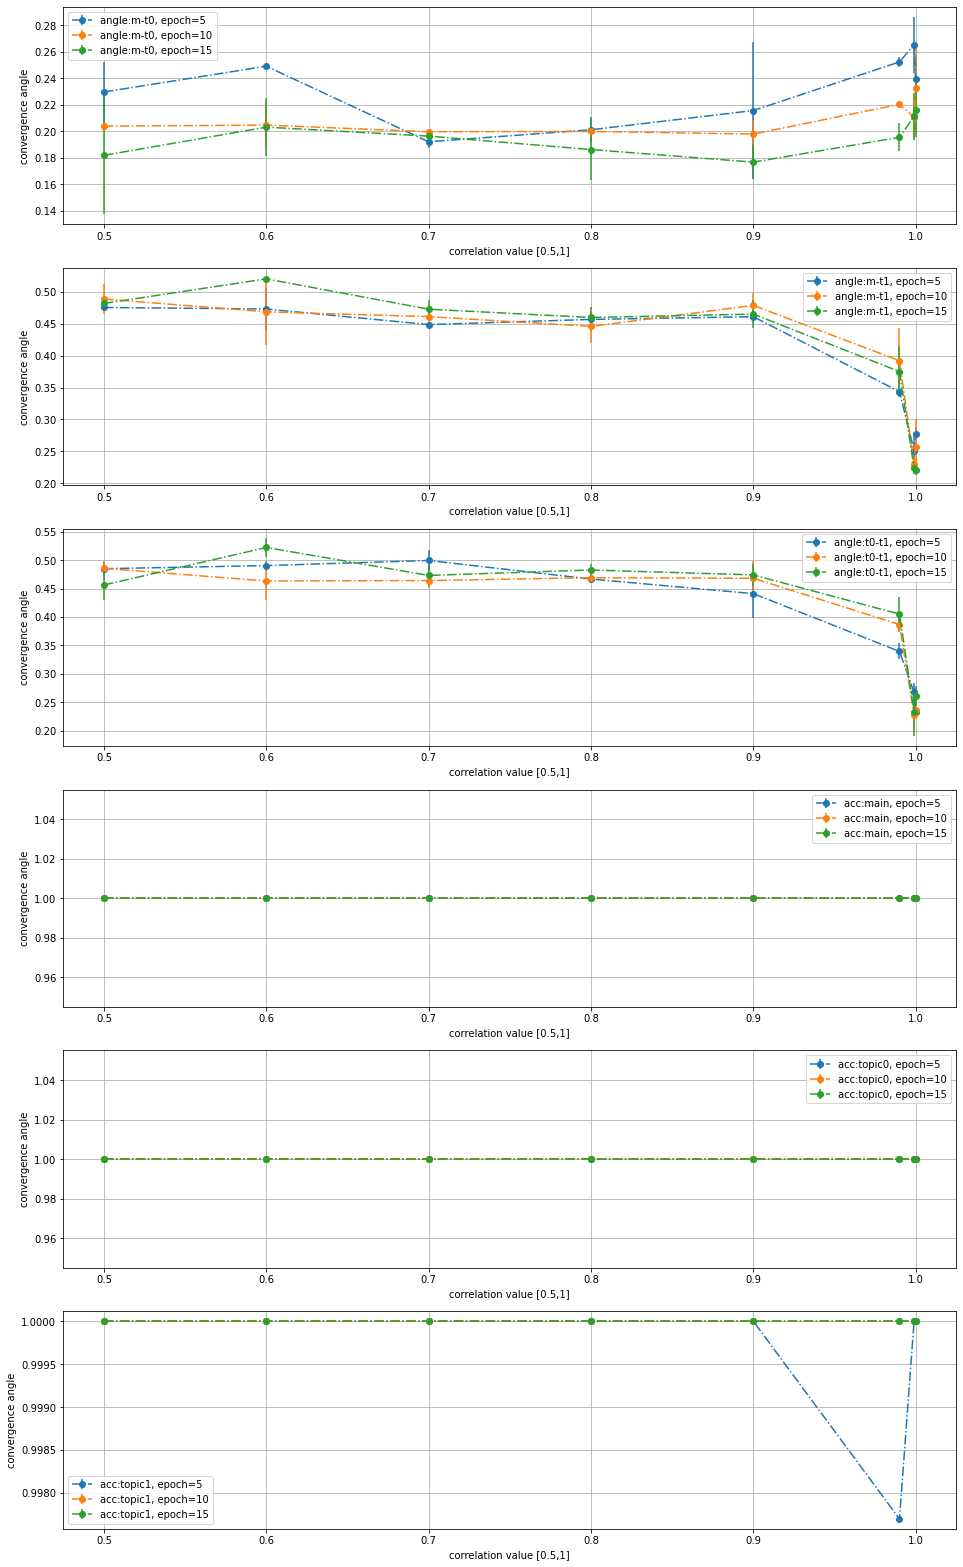

In [92]:
#Getting the result for different epochs
run_list=[0,1,]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99,0.999,0.9999]
plot_item_list = [
                    "angle:m-t0",
                    "angle:m-t1",
                    "angle:t0-t1",
                    "acc:main",
                    "acc:topic0",
                    "acc:topic1"
]


#Getting the results with epoch 5 and num samples 1000
all_result_dict = get_all_result_dict(run_list=run_list,
                                      pval_list=pval_list,
                                      fname_pattern="nlp_logs/pt.rel.5.{}.{}/probe_metric_list.json"
)
ax = plot_all_results(None,pval_list,all_result_dict,plot_item_list,extra_label=", epoch=5")


# Getting the results with epoch 10 and num samples 1000
all_result_dict = get_all_result_dict(run_list=run_list,
                                      pval_list=pval_list,
                                      fname_pattern="nlp_logs/pt.rel.{}.{}/probe_metric_list.json"
)
ax = plot_all_results(ax,pval_list,all_result_dict,plot_item_list,extra_label=", epoch=10")
# plt.show()

# #Getting the results with epoch 15 and num samples 1000
all_result_dict = get_all_result_dict(run_list=run_list,
                                      pval_list=pval_list,
                                      fname_pattern="nlp_logs/pt.rel.15.{}.{}/probe_metric_list.json"
)
ax = plot_all_results(ax,pval_list,all_result_dict,plot_item_list,extra_label=", epoch=15")

plt.show()

# Variying the number of hidden layer

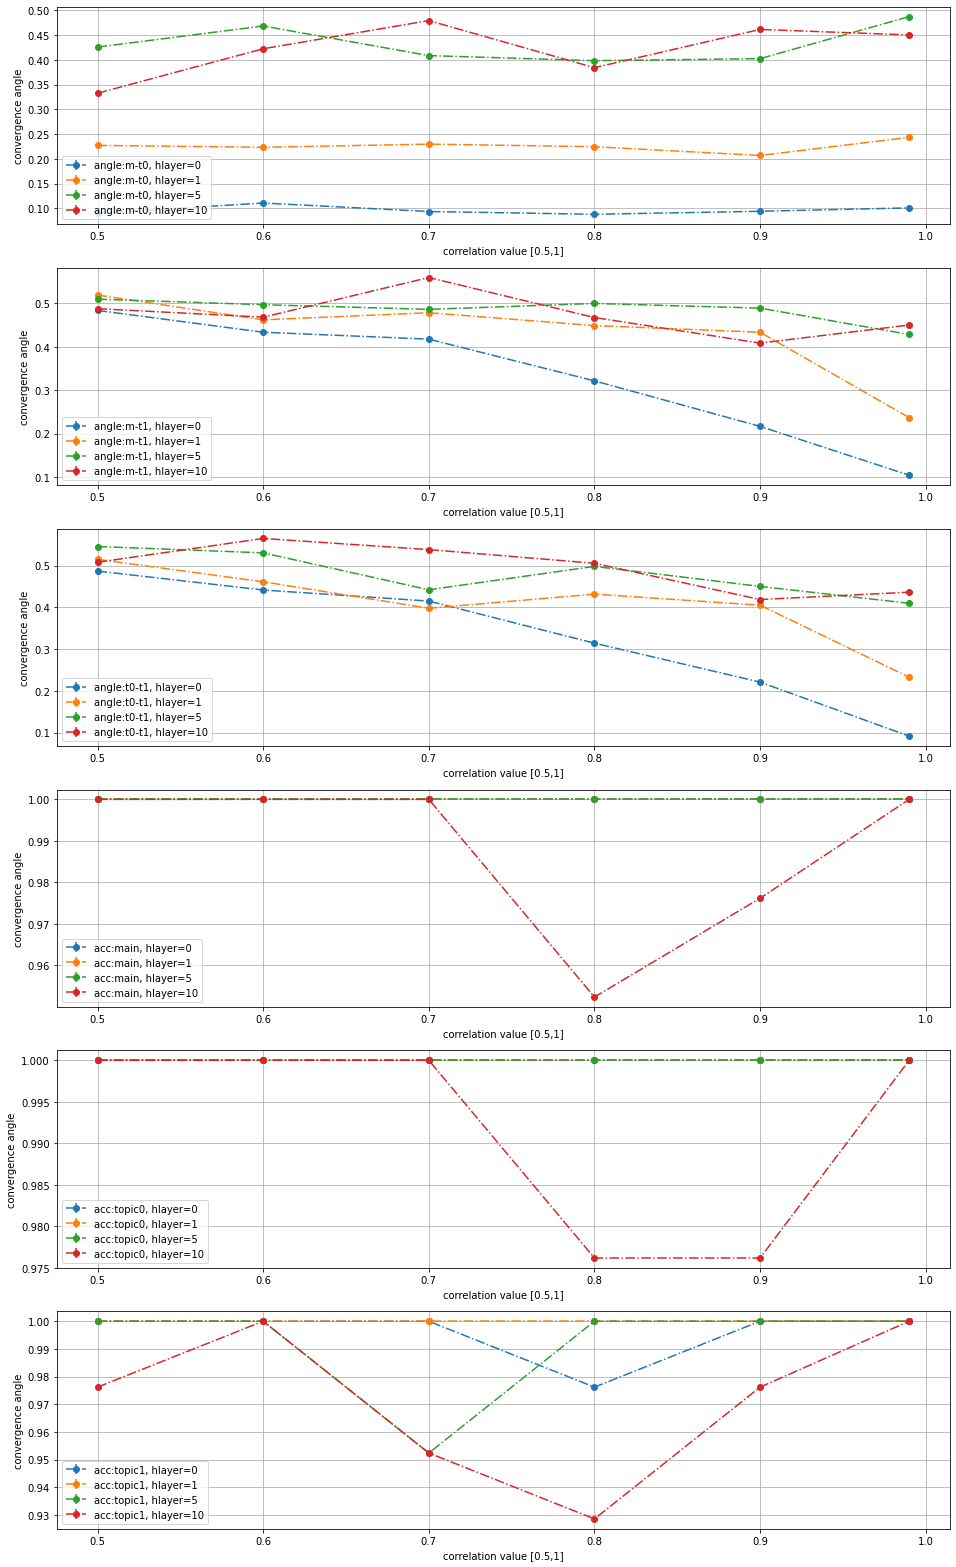

In [111]:
#Getting the result for different epochs
run_list=[0,]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99,]
plot_item_list = [
                    "angle:m-t0",
                    "angle:m-t1",
                    "angle:t0-t1",
                    "acc:main",
                    "acc:topic0",
                    "acc:topic1"
]


ax=None

#Other hyperparam
s=100
e=15
for h in [0,1,5,10]:
    all_result_dict = get_all_result_dict(run_list=run_list,
                                          pval_list=pval_list,
                                          fname_pattern="nlp_logs/pt.rel.h({}).s({}).e({}).p({}).r({})/probe_metric_list.json".format(
                                                                                  h,
                                                                                  s,
                                                                                  e,
                                                                                  "{}",
                                                                                  "{}",
                                          )
    )
    ax = plot_all_results(ax,pval_list,all_result_dict,plot_item_list,extra_label=", hlayer={}".format(h))


plt.show()

'''
Observations:

Good:
As the number of layer increases the convergence is getting less skewed? Why. Also one might claim that in deeper model
we will not have the problem then.


Bad:
Why the convergence angle between the main and the topic 0 which have 100% correlation increasing with the number of layer?
Is it becuase multipe feautre could explain the same label and one is choosing other and with large layer they are getting away 
from each other?

'''



'''
Effect of wrong convergence is more on the Fairness literature.
For property testing lit. even if convergence is correct in the subsequent step of removal we mostly will remove the
other feature since it is very correlated with the current feature.
'''

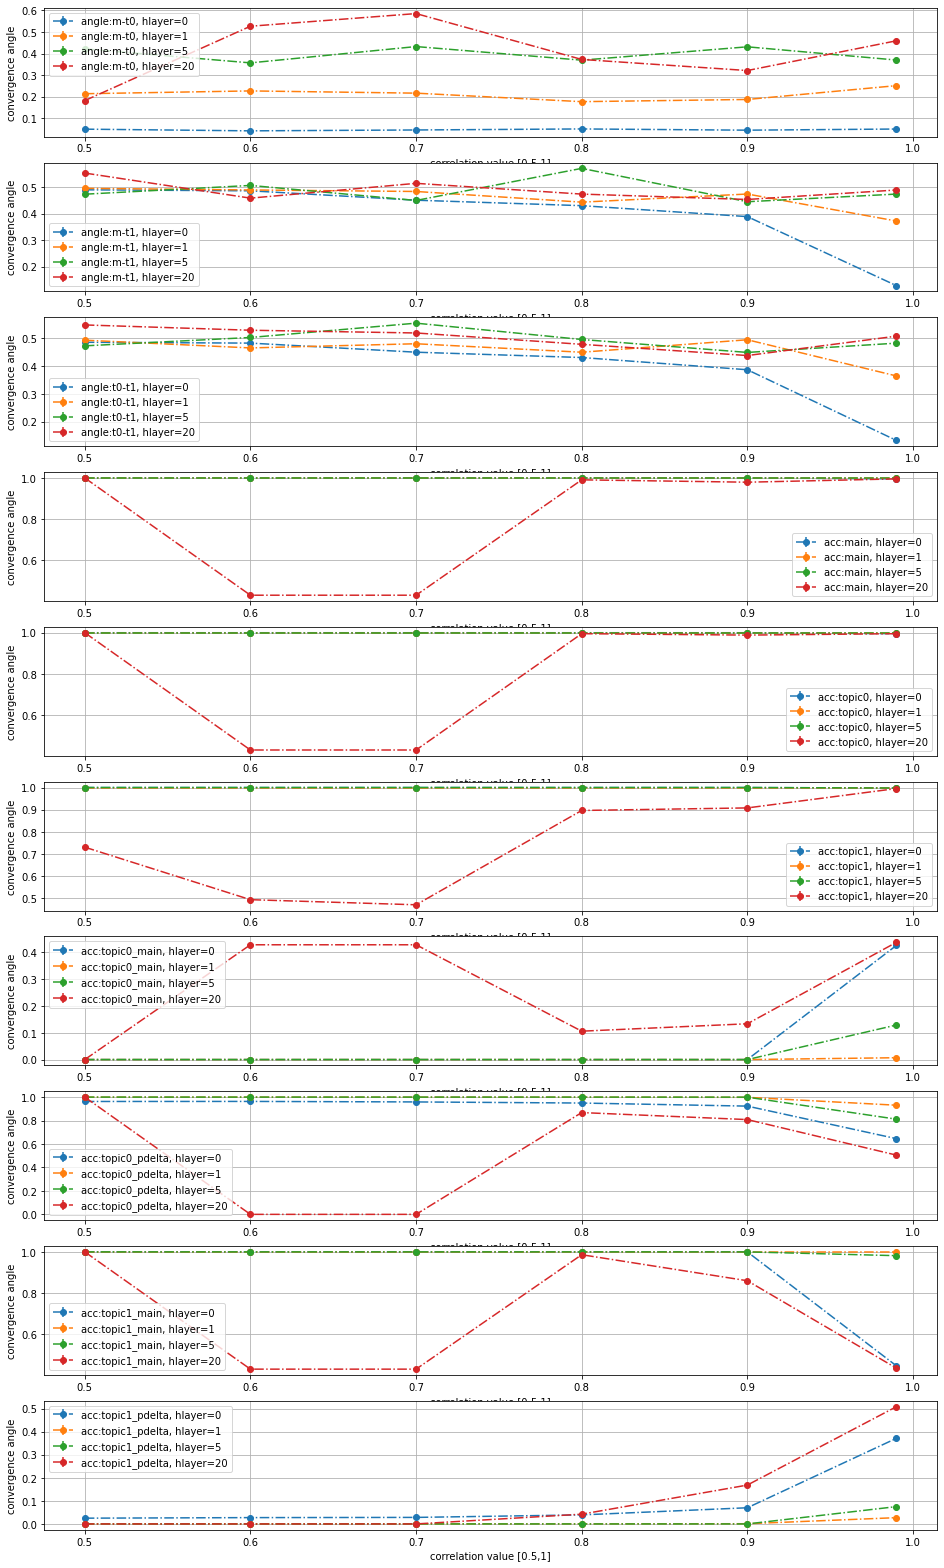

In [29]:
#Getting the result for different epochs
run_list=[0,]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99,]
plot_item_list = [
                    "angle:m-t0",
                    "angle:m-t1",
                    "angle:t0-t1",
                    "acc:main",
                    "acc:topic0",
                    "acc:topic1",
                    "acc:topic0_main",
                    "acc:topic0_pdelta",
                    "acc:topic1_main",
                    "acc:topic1_pdelta",
]


ax=None

#Other hyperparam
s=1000
e=10
for h in [0,1,5,20]:
    all_result_dict = get_all_result_dict(run_list=run_list,
                                          pval_list=pval_list,
                                          fname_pattern="nlp_logs/pt.rel.h({}).s({}).e({}).p({}).r({})/probe_metric_list.json".format(
                                                                                  h,
                                                                                  s,
                                                                                  e,
                                                                                  "{}",
                                                                                  "{}",
                                          )
    )
    ax = plot_all_results(ax,pval_list,all_result_dict,plot_item_list,extra_label=", hlayer={}".format(h))


plt.show()

# Varying the number of sample

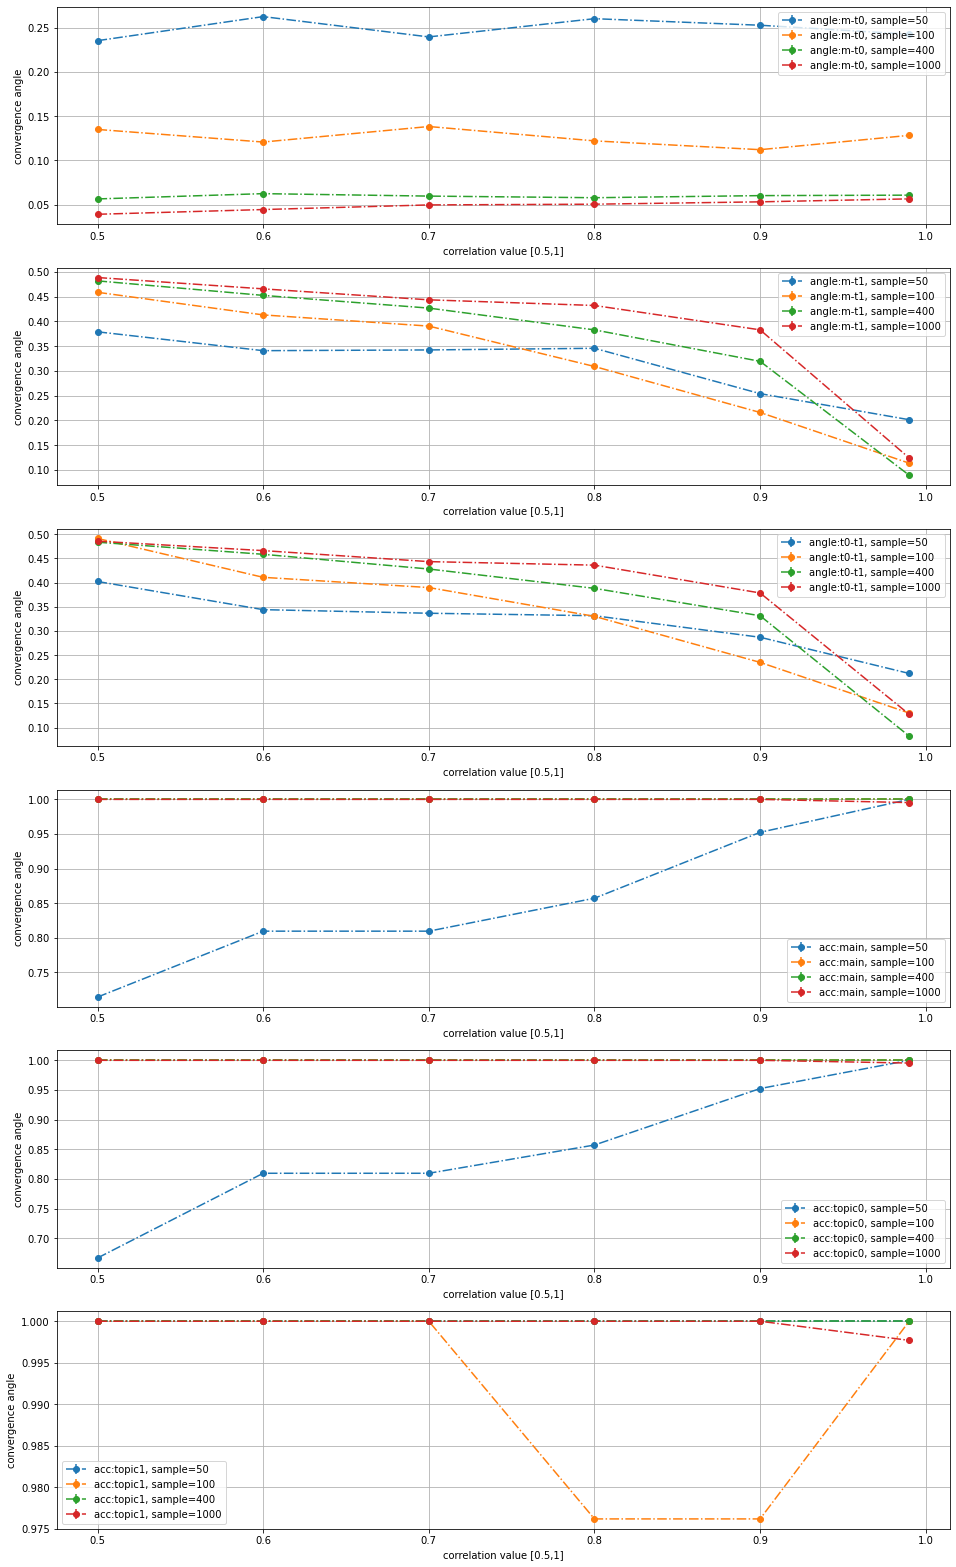

In [112]:
run_list=[0,]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99,]
plot_item_list = [
                    "angle:m-t0",
                    "angle:m-t1",
                    "angle:t0-t1",
                    "acc:main",
                    "acc:topic0",
                    "acc:topic1"
]


ax=None

#Other hyperparam
h=0
e=10
for s in [50,100,400,1000]:
    all_result_dict = get_all_result_dict(run_list=run_list,
                                          pval_list=pval_list,
                                          fname_pattern="nlp_logs/pt.rel.h({}).s({}).e({}).p({}).r({})/probe_metric_list.json".format(
                                                                                  h,
                                                                                  s,
                                                                                  e,
                                                                                  "{}",
                                                                                  "{}",
                                          )
    )
    ax = plot_all_results(ax,pval_list,all_result_dict,plot_item_list,extra_label=", sample={}".format(s))


plt.show()

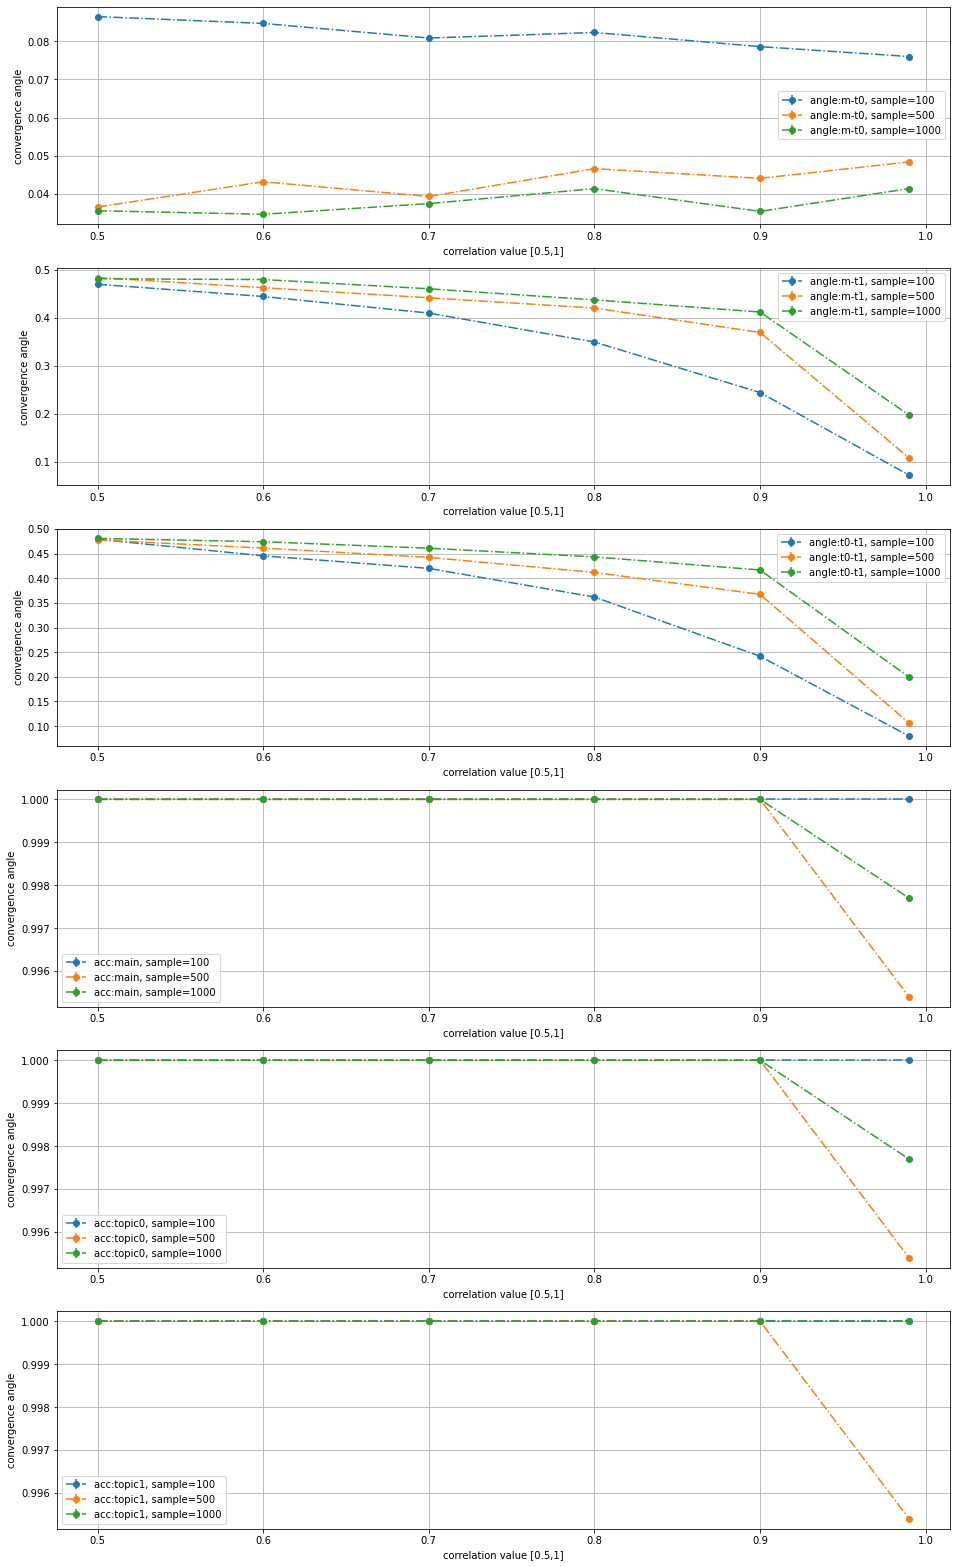

In [13]:
run_list=[0,]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99,]
plot_item_list = [
                    "angle:m-t0",
                    "angle:m-t1",
                    "angle:t0-t1",
                    "acc:main",
                    "acc:topic0",
                    "acc:topic1"
]


ax=None

#Other hyperparam
h=0
e=20
for s in [100,500,1000]:
    all_result_dict = get_all_result_dict(run_list=run_list,
                                          pval_list=pval_list,
                                          fname_pattern="nlp_logs/pt.rel.h({}).s({}).e({}).p({}).r({})/probe_metric_list.json".format(
                                                                                  h,
                                                                                  s,
                                                                                  e,
                                                                                  "{}",
                                                                                  "{}",
                                          )
    )
    ax = plot_all_results(ax,pval_list,all_result_dict,plot_item_list,extra_label=", sample={}".format(s))


plt.show()

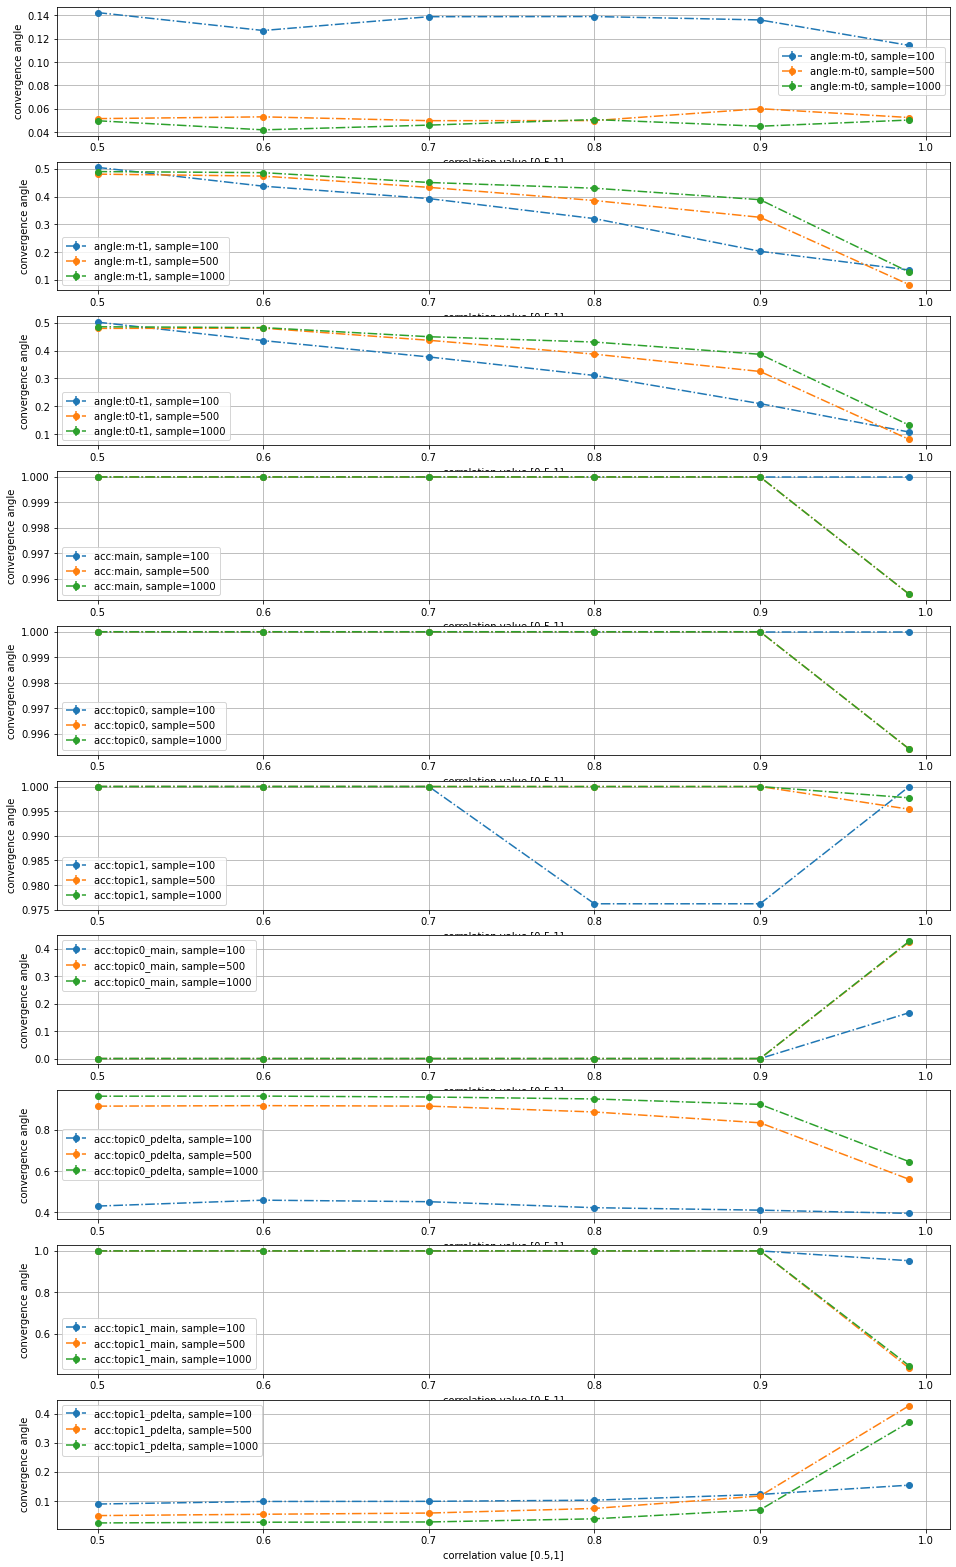

In [26]:
run_list=[0,]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99,]
plot_item_list = [
                    "angle:m-t0",
                    "angle:m-t1",
                    "angle:t0-t1",
                    "acc:main",
                    "acc:topic0",
                    "acc:topic1",
                    "acc:topic0_main",
                    "acc:topic0_pdelta",
                    "acc:topic1_main",
                    "acc:topic1_pdelta",
]


ax=None

#Other hyperparam
h=0
e=10
for s in [100,500,1000]:
    all_result_dict = get_all_result_dict(run_list=run_list,
                                          pval_list=pval_list,
                                          fname_pattern="nlp_logs/pt.rel.h({}).s({}).e({}).p({}).r({})/probe_metric_list.json".format(
                                                                                  h,
                                                                                  s,
                                                                                  e,
                                                                                  "{}",
                                                                                  "{}",
                                          )
    )
    ax = plot_all_results(ax,pval_list,all_result_dict,plot_item_list,extra_label=", sample={}".format(s))


plt.show()

# Varying the number of epochs

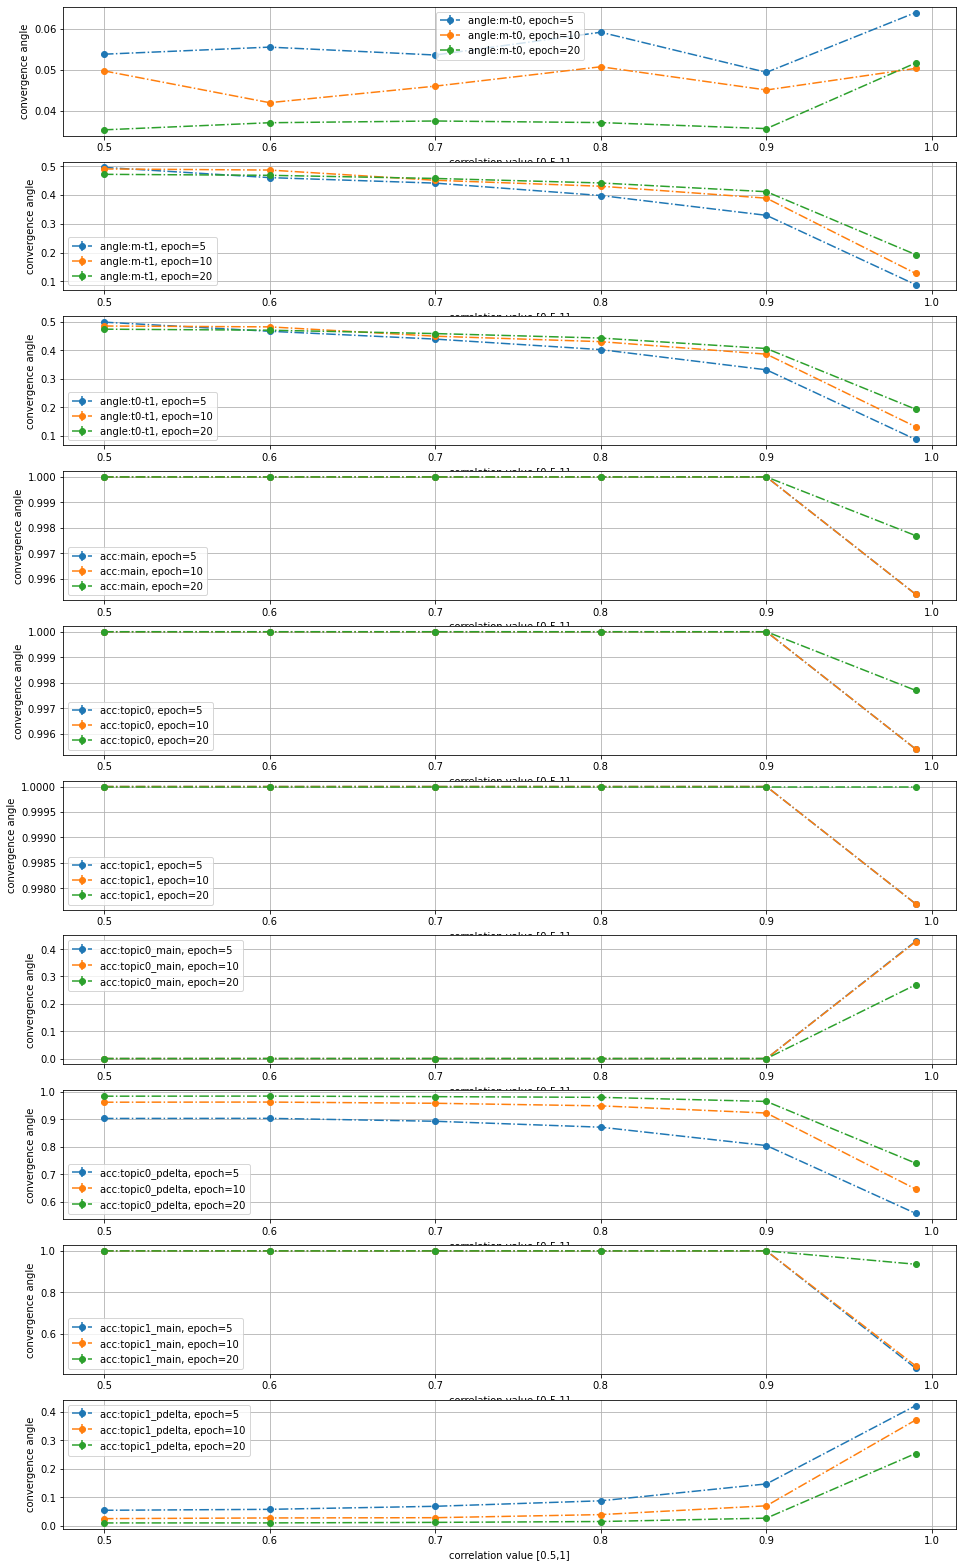

'\nWith more epoch/trainning it seems it is getting more biased is using other feature too. This was expected.\nVerify this with other sample size.\n'

In [25]:
run_list=[0,]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99,]
plot_item_list = [
                    "angle:m-t0",
                    "angle:m-t1",
                    "angle:t0-t1",
                    "acc:main",
                    "acc:topic0",
                    "acc:topic1",
                    "acc:topic0_main",
                    "acc:topic0_pdelta",
                    "acc:topic1_main",
                    "acc:topic1_pdelta",
]


ax=None

#Other hyperparam
h=0
s=1000
for e in [5,10,20]:
    all_result_dict = get_all_result_dict(run_list=run_list,
                                          pval_list=pval_list,
                                          fname_pattern="nlp_logs/pt.rel.h({}).s({}).e({}).p({}).r({})/probe_metric_list.json".format(
                                                                                  h,
                                                                                  s,
                                                                                  e,
                                                                                  "{}",
                                                                                  "{}",
                                          )
    )
#     print(all_result_dict)
    ax = plot_all_results(ax,pval_list,all_result_dict,plot_item_list,extra_label=", epoch={}".format(e))


plt.show()
'''
With more epoch/trainning it seems it is getting more biased is using other feature too. This was expected.
Verify this with other sample size.
'''

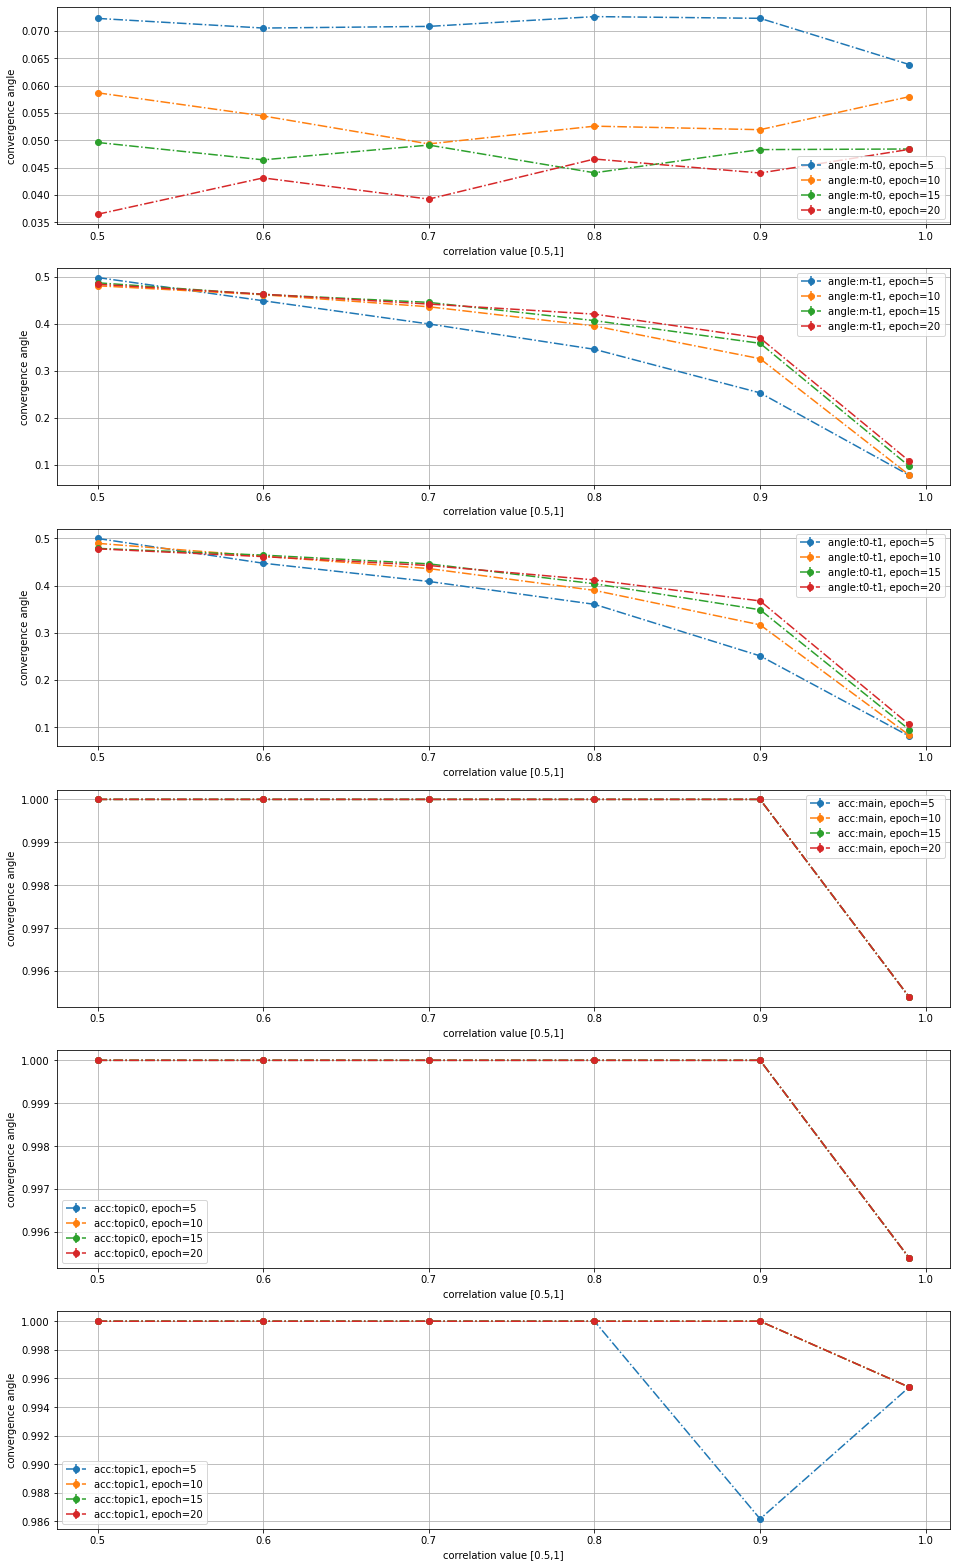

'\nWith more epoch/trainning it seems it is getting more biased is using other feature too. This was expected.\nVerify this with other sample size.\n'

In [8]:
run_list=[0,]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99,]
plot_item_list = [
                    "angle:m-t0",
                    "angle:m-t1",
                    "angle:t0-t1",
                    "acc:main",
                    "acc:topic0",
                    "acc:topic1"
]


ax=None

#Other hyperparam
h=0
s=500
for e in [5,10,15,20]:
    all_result_dict = get_all_result_dict(run_list=run_list,
                                          pval_list=pval_list,
                                          fname_pattern="nlp_logs/pt.rel.h({}).s({}).e({}).p({}).r({})/probe_metric_list.json".format(
                                                                                  h,
                                                                                  s,
                                                                                  e,
                                                                                  "{}",
                                                                                  "{}",
                                          )
    )
    ax = plot_all_results(ax,pval_list,all_result_dict,plot_item_list,extra_label=", epoch={}".format(e))


plt.show()
'''
With more epoch/trainning it seems it is getting more biased is using other feature too. This was expected.
Verify this with other sample size.
'''

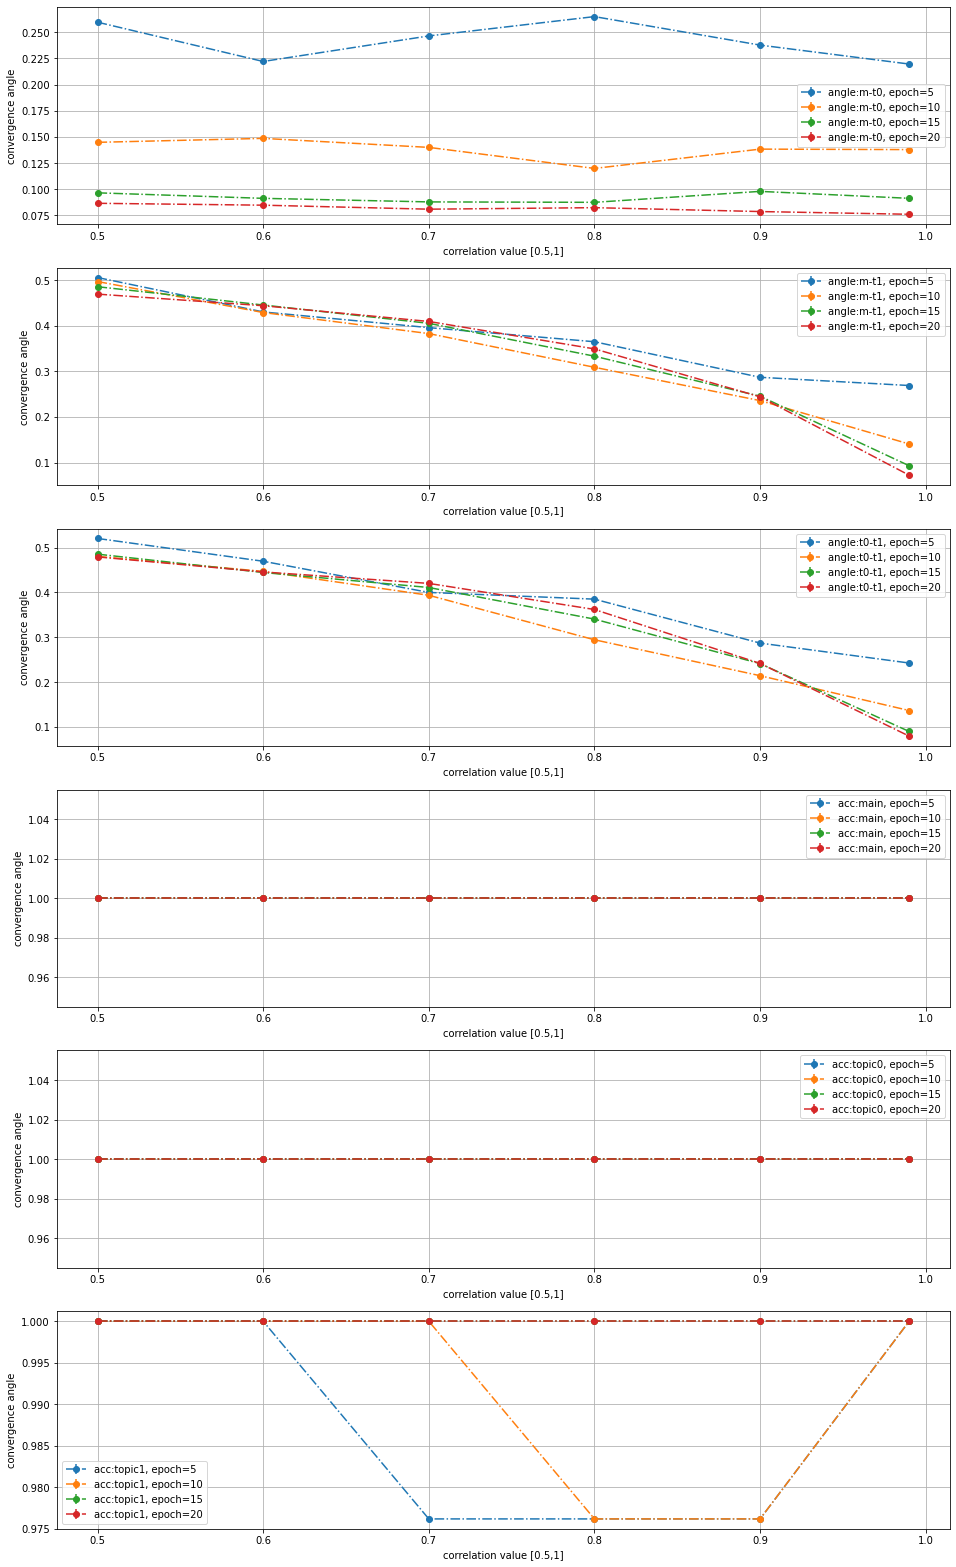

'\nWith more epoch/trainning it seems it is getting more biased is using other feature too. This was expected.\nVerify this with other sample size.\n'

In [9]:
run_list=[0,]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99,]
plot_item_list = [
                    "angle:m-t0",
                    "angle:m-t1",
                    "angle:t0-t1",
                    "acc:main",
                    "acc:topic0",
                    "acc:topic1"
]


ax=None

#Other hyperparam
h=0
s=100
for e in [5,10,15,20]:
    all_result_dict = get_all_result_dict(run_list=run_list,
                                          pval_list=pval_list,
                                          fname_pattern="nlp_logs/pt.rel.h({}).s({}).e({}).p({}).r({})/probe_metric_list.json".format(
                                                                                  h,
                                                                                  s,
                                                                                  e,
                                                                                  "{}",
                                                                                  "{}",
                                          )
    )
    ax = plot_all_results(ax,pval_list,all_result_dict,plot_item_list,extra_label=", epoch={}".format(e))


plt.show()
'''
With more epoch/trainning it seems it is getting more biased is using other feature too. This was expected.
Verify this with other sample size.
'''